## Fitbit Charge 1 year tracking data

#### Dataset location https://www.kaggle.com/alketcecaj/one-year-of-fitbit-chargehr-data


- datetime aggregate by weeks and months http://blog.josephmisiti.com/group-by-datetimes-in-pandas
- python time seies data analysis https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
- python date time https://predictablynoisy.com/date-time-python



Analysis steps

+ Read the data
+ Feature engineering (Capture the date month, Calculate the sum of all activities)
- Plot the activite time Vs calories
- Determine the correlation between different activites and calories

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

dir_data = r'.'
print(os.listdir(dir_data))


from __future__ import division
from __future__ import print_function

import time

import numpy as np
import scipy.sparse as sp
from sklearn.preprocessing import MaxAbsScaler, scale, StandardScaler, MinMaxScaler

import tensorflow as tf
print(tf.__version__)


## plotting
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline
# Any results you write to the current directory are saved as output.



['.git', '.ipynb_checkpoints', 'kaggle_fitbit_charge_Analysis.ipynb', 'one-year-of-fitbit-chargehr-data.zip', 'One_Year_of_FitBitChargeHR_Data.csv']
1.2.1


### Import data and perform QC

In [2]:
## function to import csv and do QC

def import_QC(folder,file_in,sep_file=','):
    """
    The function performs CSV file import and performs
    QC of shape and head
    
    outputs a pandas dataframe
    """
    ## Import data
    file_in = folder + '/' + file_in 
    temp_df = pd.read_csv(file_in,sep=sep_file)
    
    ## QC dataframe 
    print(temp_df.shape)
    print(temp_df.head())
    
    ## return
    return(temp_df)

In [3]:
## Import data training
folder = dir_data
file_in = r'one-year-of-fitbit-chargehr-data.zip'
tracker_df = import_QC(folder,file_in)

(367, 10)
         Date  Calories    Steps Distance  floors  Minutes_sitting  \
0  08-05-2015     1.934  905.000     0,65       0            1.355   
1  09-05-2015     3.631   18.925    14,11       4          611.000   
2  10-05-2015     3.204   14.228    10,57       1          602.000   
3  11-05-2015     2.673    6.756     5,02       8          749.000   
4  12-05-2015     2.495    5.020     3,73       1          876.000   

   Minutes_of_slow_activity  Minutes_of_moderate_activity  \
0                        46                             0   
1                       316                            61   
2                       226                            14   
3                       190                            23   
4                       171                             0   

   Minutes_of_intense_activity  Calories_Activity  
0                            0            168.000  
1                           60              2.248  
2                           77              1.

In [4]:
## Convert the date column datatype to datatime and 
## extract the day of the month

tracker_df['Date'] = pd.to_datetime(tracker_df['Date'],format='%d-%m-%Y')
tracker_df['Date_only'] = pd.to_datetime(tracker_df['Date']).dt.day

In [5]:
tracker_df.index = tracker_df['Date']
del tracker_df['Date']

In [6]:
## sum  the slow, moderate and intense activity and create 'all_activity'

tracker_df['all_activity'] = tracker_df[['Minutes_of_intense_activity','Minutes_of_moderate_activity','Minutes_of_slow_activity']].sum(axis=1)



In [7]:
print(tracker_df.dtypes)
tracker_df.head()

Calories                        float64
Steps                           float64
Distance                         object
floors                            int64
Minutes_sitting                 float64
Minutes_of_slow_activity          int64
Minutes_of_moderate_activity      int64
Minutes_of_intense_activity       int64
Calories_Activity               float64
Date_only                         int64
all_activity                      int64
dtype: object


,Calories,Steps,Distance,floors,Minutes_sitting,Minutes_of_slow_activity,Minutes_of_moderate_activity,Minutes_of_intense_activity,Calories_Activity,Date_only,all_activity
Date,,,,,,,,,,,
2015-05-08,1.934,905.000,"0,65",0,1.355,46,0,0,168.000,8,46
2015-05-09,3.631,18.925,"14,11",4,611.000,316,61,60,2.248,9,437
2015-05-10,3.204,14.228,"10,57",1,602.000,226,14,77,1.719,10,317
2015-05-11,2.673,6.756,"5,02",8,749.000,190,23,4,962.000,11,217
2015-05-12,2.495,5.020,"3,73",1,876.000,171,0,0,736.000,12,171


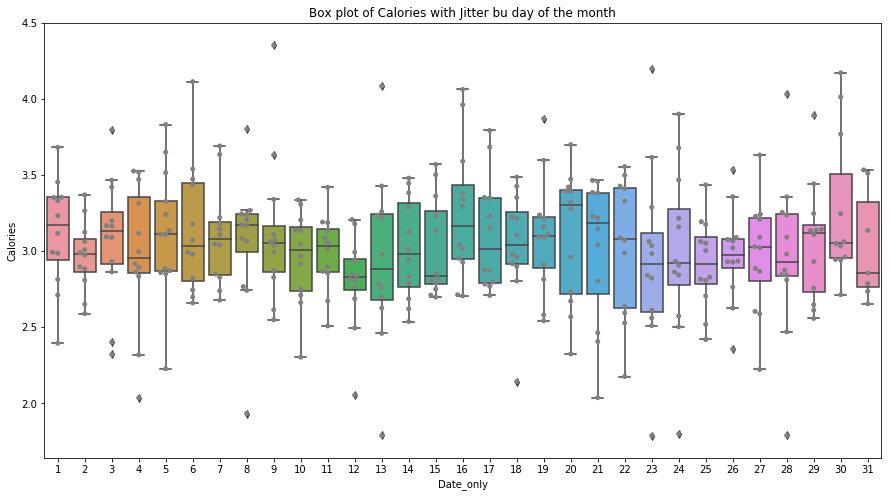

In [8]:
### Groupby the day of the month and make a boxplot of calories burnt

# figure size
plt.figure(figsize=(15,8))

# Usual boxplot
ax = sns.boxplot(x='Date_only', y='Calories', data=tracker_df)
 
# Add jitter with the swarmplot function.
ax = sns.swarmplot(x='Date_only', y='Calories', data=tracker_df, color="grey")

ax.set_title('Box plot of Calories with Jitter bu day of the month')

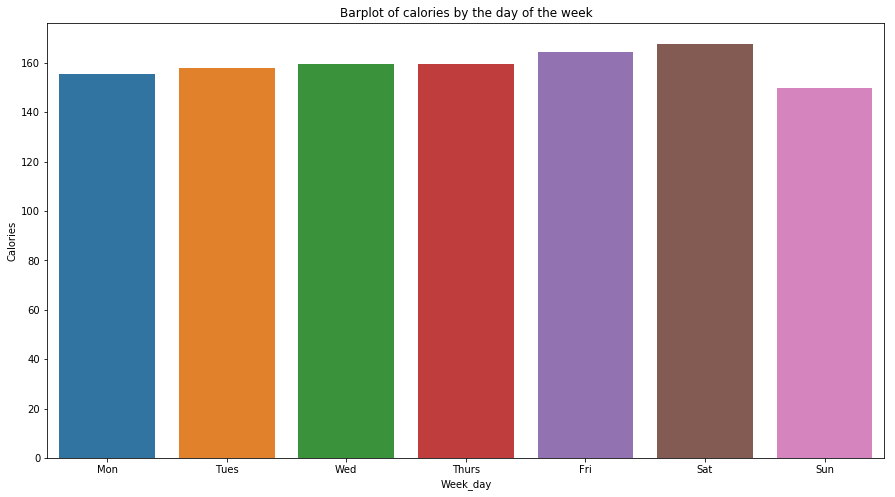

In [9]:
## Groupby the weekday and plot statistics by day of the week

by_weekday = pd.DataFrame()
by_weekday['Calories'] = tracker_df['Calories'].groupby(tracker_df.index.dayofweek).sum()
by_weekday['Week_day'] = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

# figure size
plt.figure(figsize=(15,8))

# simple barplot
ax = sns.barplot(x='Week_day', y='Calories',  data=by_weekday)

ax.set_title('Barplot of calories by the day of the week')

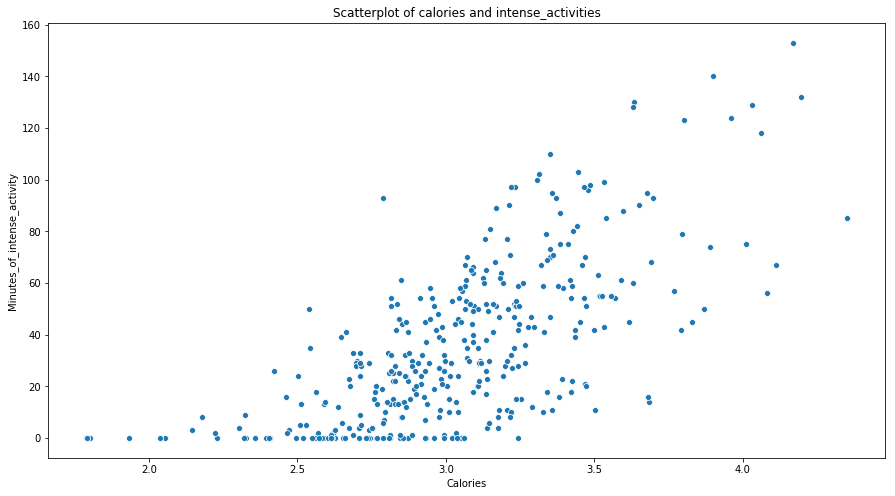

In [10]:
### Scatterplot of Calories Vs intense activity

# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot
ax = sns.scatterplot(x='Calories', y='Minutes_of_intense_activity', data=tracker_df)

ax.set_title('Scatterplot of calories and intense_activities')

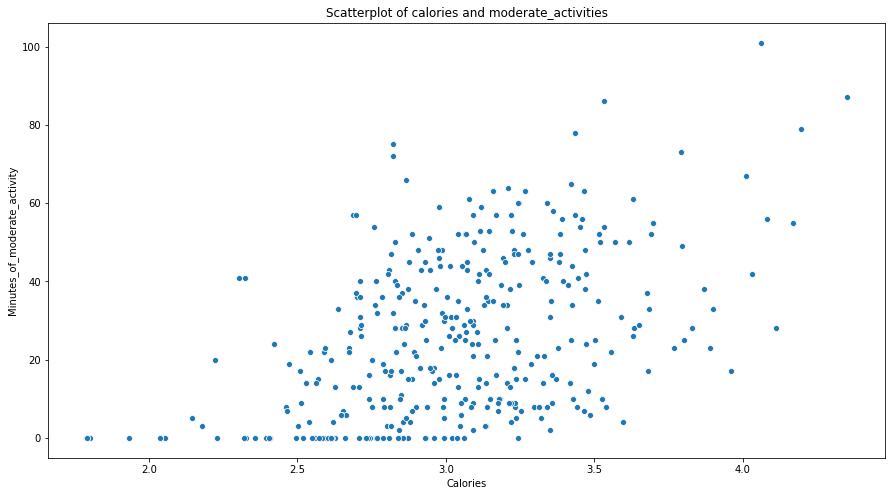

In [11]:
### Scatterplot of Calories Vs moderate activity

# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot
ax = sns.scatterplot(x='Calories', y='Minutes_of_moderate_activity', data=tracker_df)

ax.set_title('Scatterplot of calories and moderate_activities')

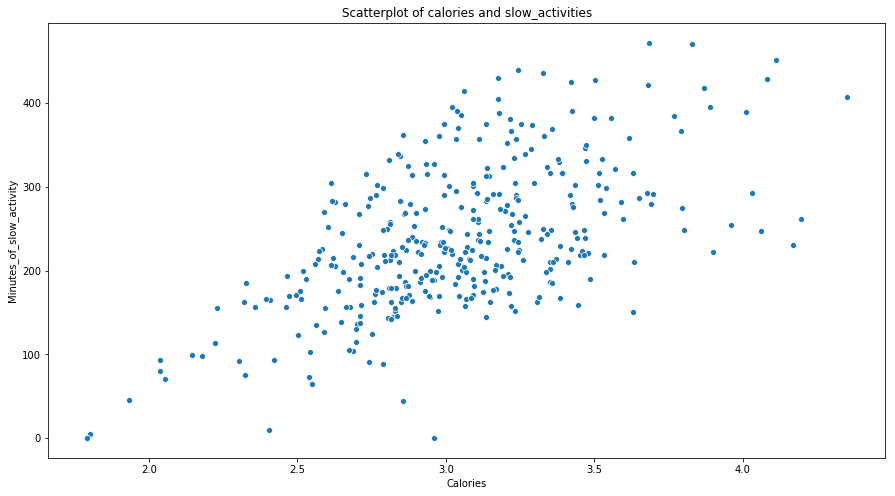

In [12]:
### Scatterplot of Calories Vs slow activity

# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot
ax = sns.scatterplot(x='Calories', y='Minutes_of_slow_activity', data=tracker_df)

ax.set_title('Scatterplot of calories and slow_activities')

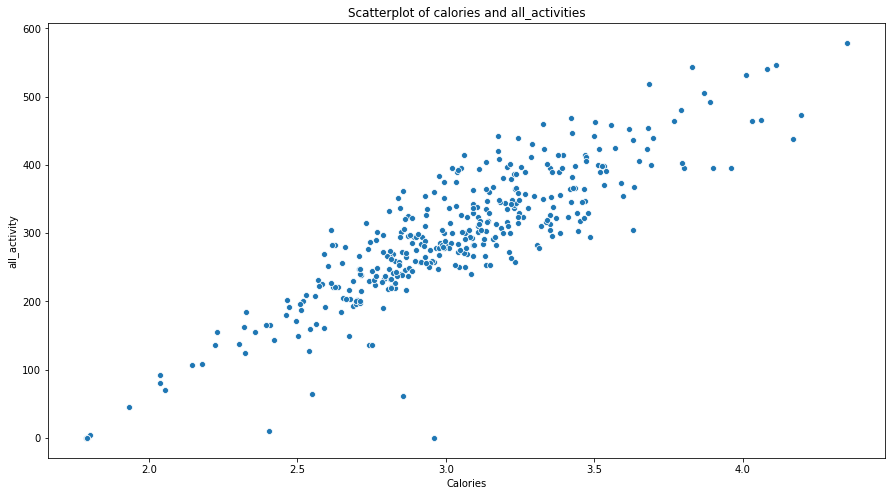

In [13]:
### Scatterplot of Calories Vs all_activity

# figure size
plt.figure(figsize=(15,8))

# Simple scatterplot
ax = sns.scatterplot(x='Calories', y='all_activity', data=tracker_df)

ax.set_title('Scatterplot of calories and all_activities')

#### Plot the intense, modirate and slow activity along with Calories burnt

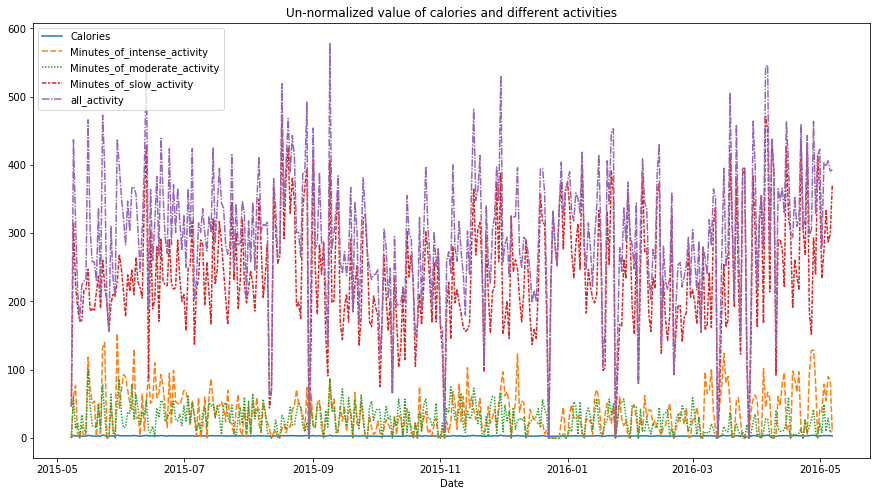

In [14]:
## plot the raw values 

col_select = ['Calories','Minutes_of_intense_activity','Minutes_of_moderate_activity','Minutes_of_slow_activity','all_activity']
wide_df = tracker_df[col_select]

# figure size
plt.figure(figsize=(15,8))

# timeseries plot using lineplot
ax = sns.lineplot(data=wide_df)

ax.set_title('Un-normalized value of calories and different activities')

#### Rolling average of intense, modirate and slow activity along with Calories burnt

In [15]:
## Calculate the rolling averages

calories_roll = tracker_df['Calories'].rolling(window='10D').mean()
slow_activity_roll = tracker_df['Minutes_of_slow_activity'].rolling(window='10D').mean()
moderate_activity_roll = tracker_df['Minutes_of_moderate_activity'].rolling(window='10D').mean()
intense_activity_roll = tracker_df['Minutes_of_intense_activity'].rolling(window='10D').mean()
all_activity_roll = tracker_df['all_activity'].rolling(window='10D').mean()

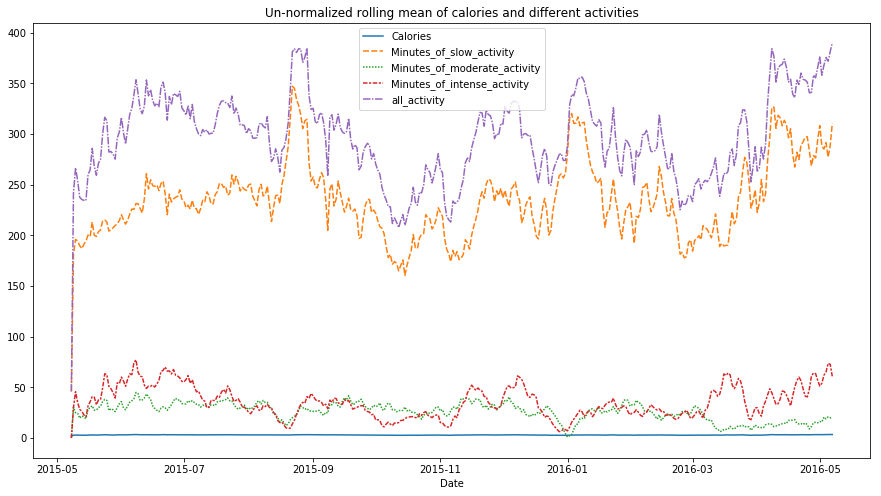

In [16]:
## Plot all the rolling averages

col_select = ['Calories','Minutes_of_intense_activity','Minutes_of_moderate_activity','Minutes_of_slow_activity','all_activity']
wide_df = pd.concat([calories_roll,slow_activity_roll,moderate_activity_roll,intense_activity_roll,all_activity_roll],axis=1)

# figure size
plt.figure(figsize=(15,8))

# timeseries plot using lineplot
ax = sns.lineplot(data=wide_df)

ax.set_title('Un-normalized rolling mean of calories and different activities')


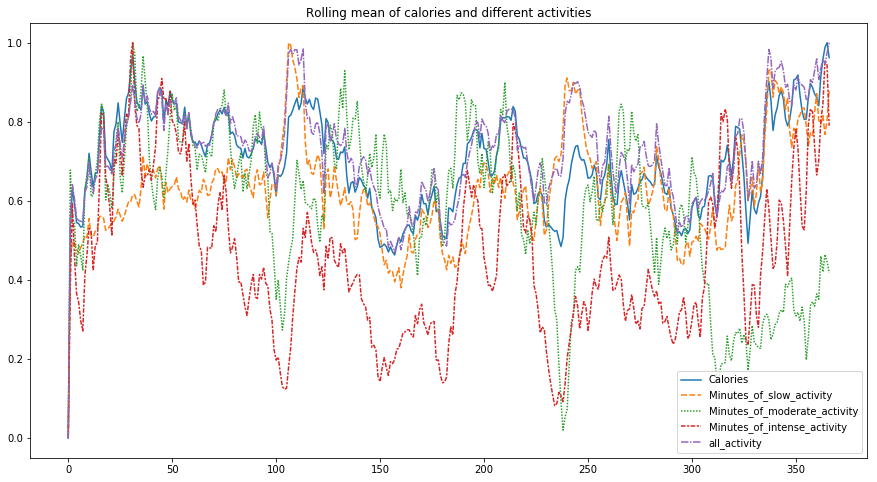

In [17]:
## Plot the scaled rolling averages

wide_df = pd.concat([calories_roll,slow_activity_roll,moderate_activity_roll,intense_activity_roll,all_activity_roll],axis=1)
scaler = MinMaxScaler()

wide_df_scaled = pd.DataFrame(scaler.fit_transform(wide_df), columns=wide_df.columns)
# figure size
plt.figure(figsize=(15,8))

# timeseries plot using lineplot
ax = sns.lineplot(data=wide_df_scaled )

ax.set_title('Rolling mean of calories and different activities')

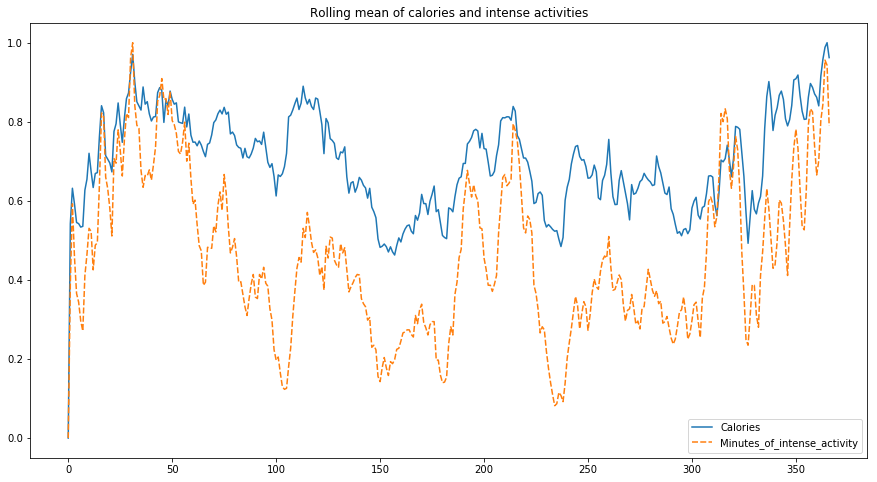

In [18]:
## Plot the scaled rolling averages

wide_df = pd.concat([calories_roll,intense_activity_roll],axis=1)
scaler = MinMaxScaler()

wide_df_scaled = pd.DataFrame(scaler.fit_transform(wide_df), columns=wide_df.columns)
# figure size
plt.figure(figsize=(15,8))

# timeseries plot using lineplot
ax = sns.lineplot(data=wide_df_scaled )

ax.set_title('Rolling mean of calories and intense activities')

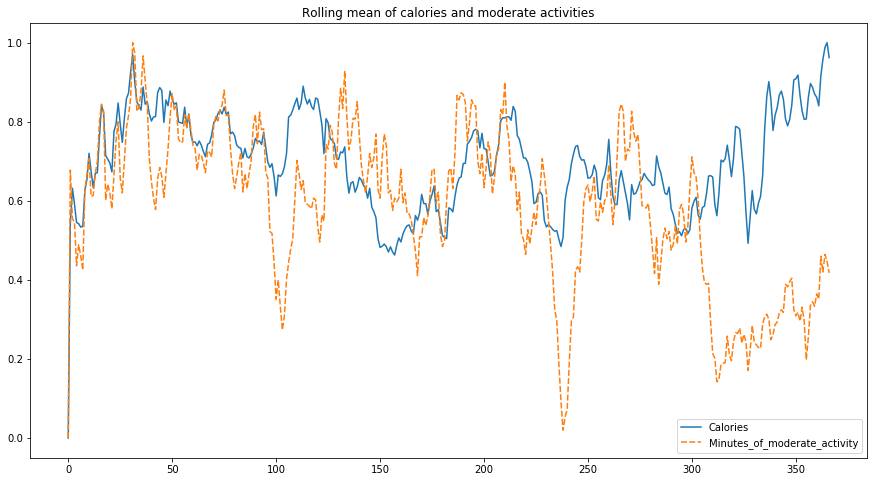

In [19]:
## Plot the scaled rolling averages

wide_df = pd.concat([calories_roll,moderate_activity_roll],axis=1)
scaler = MinMaxScaler()

wide_df_scaled = pd.DataFrame(scaler.fit_transform(wide_df), columns=wide_df.columns)
# figure size
plt.figure(figsize=(15,8))

# timeseries plot using lineplot
ax = sns.lineplot(data=wide_df_scaled )

ax.set_title('Rolling mean of calories and moderate activities')

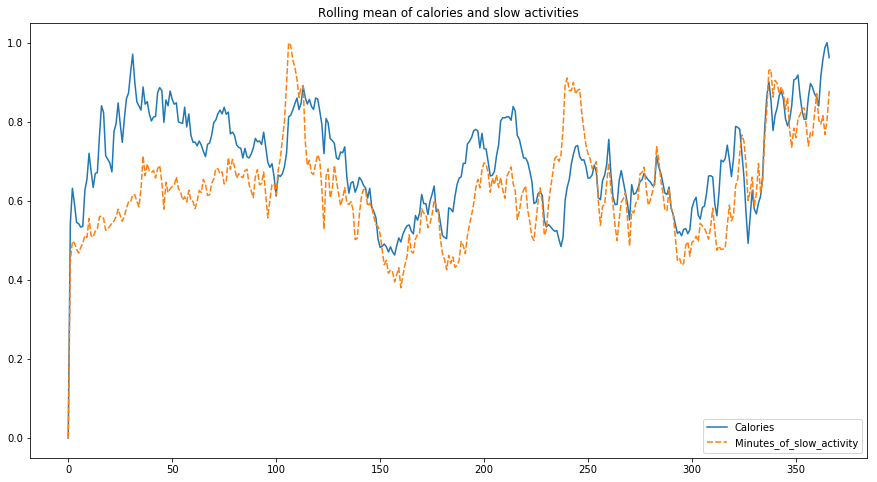

In [20]:
## Plot the scaled rolling averages

wide_df = pd.concat([calories_roll,slow_activity_roll],axis=1)
scaler = MinMaxScaler()

wide_df_scaled = pd.DataFrame(scaler.fit_transform(wide_df), columns=wide_df.columns)
# figure size
plt.figure(figsize=(15,8))

# timeseries plot using lineplot
ax = sns.lineplot(data=wide_df_scaled )

ax.set_title('Rolling mean of calories and slow activities')

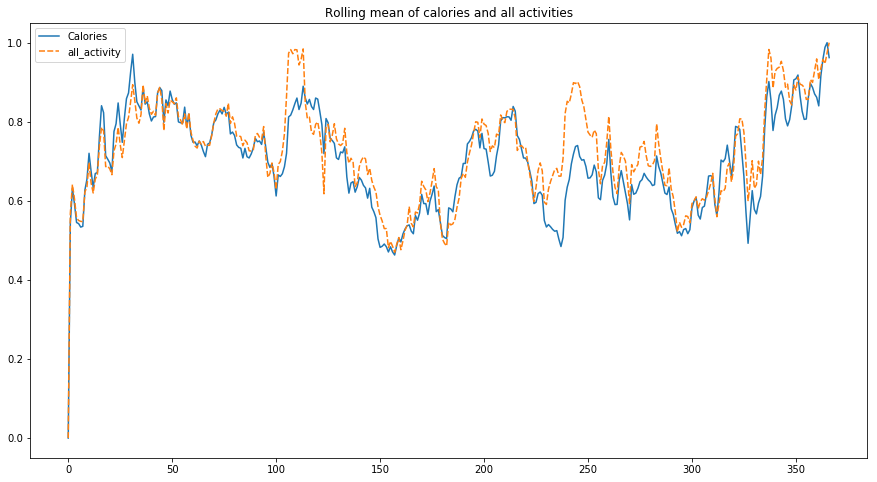

In [21]:
## Plot the scaled rolling averages

wide_df = pd.concat([calories_roll,all_activity_roll],axis=1)
scaler = MinMaxScaler()

wide_df_scaled = pd.DataFrame(scaler.fit_transform(wide_df), columns=wide_df.columns)
# figure size
plt.figure(figsize=(15,8))

# timeseries plot using lineplot
ax = sns.lineplot(data=wide_df_scaled )

ax.set_title('Rolling mean of calories and all activities')

#### Determine the correlation between different activities and calories, and plot a heatmap

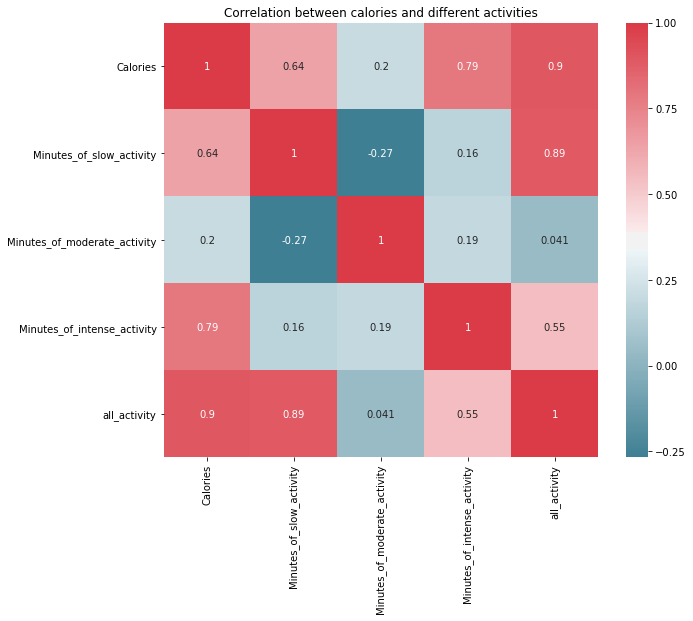

In [22]:
wide_df = pd.concat([calories_roll,slow_activity_roll,moderate_activity_roll,intense_activity_roll,all_activity_roll],axis=1)

f, ax = pl.subplots(figsize=(10, 8))
corr_temp = wide_df.corr()
ax = sns.heatmap(corr_temp, mask=np.zeros_like(corr_temp, dtype=np.bool), 
                 cmap=sns.diverging_palette(220, 10, as_cmap=True),
                 annot=True, square=True)

ax.set_title('Correlation between calories and different activities')